There are 5 stages that in RFM Clustering Project
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation

# 1. Business Understanding

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

Recency: How recently did the customer purchase?

Frequency: How often do they purchase?

Monetary Value: How much do they spend?

In this case, we have E-Commerce Dataset and the main purpose that is to cluster customer groups to find the best customer group (most transactions, recently transacting time and largest transaction value)

# 2. Data Understanding

Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import squarify

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import datetime as dt

import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

Import Data

In [2]:
data = pd.read_csv('E-Commerce.csv', encoding = 'unicode_escape')

In [3]:
df = data.copy()

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Number of distinct custome
df["CustomerID"].nunique()

4372

In [6]:
df.shape

(541909, 8)

Dataset has 8 variables with 541909 observations. Including variables InvoiceNo, Quantity, InvoiceDate, UnitPrice, CustomerID

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceDate variable must be in datetime format, CustomerID must be object

In [8]:
missing_value = df.isnull().sum()
missing_percent = round(missing_value/df.shape[0],4) * 100
missing = pd.DataFrame({"Missing_Count":missing_value,"Missing_Percent":missing_percent})
missing

,Missing_Count,Missing_Percent
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


Description variable contains 1454 NaN values, CustomerID contains 135080 NaN values. In which CustomerID has more than 24% NaN values

In [9]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

Duplicated mainly by StockCode, which is a commodity code

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Check the accuracy of data

In [11]:
x = df[df["Quantity"] <0]["Quantity"].count()
y = df["Quantity"].count()
print("Quantity < 0 accounts for " + str(round((x/y)*100,2)) + " %")

Quantity < 0 accounts for 1.96 %


In [12]:
x = df[df["UnitPrice"] <0]["UnitPrice"].count()
y = df["UnitPrice"].count()
print("UnitPrice < 0 accounts for " + str(round((x/y)*100,5)) + " %")

UnitPrice < 0 accounts for 0.00037 %


UnitPrice only has more than 0% of incorrect values (<0) and Quanlity accounts for 2.1% of incorrect values => No need to remove, just correct

Check outliers

<AxesSubplot:xlabel='Quantity'>

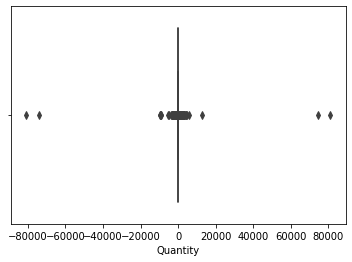

In [13]:
sns.boxplot(df["Quantity"], data = df)

In [14]:
df["Quantity"].quantile(q= 1)

80995.0

In [15]:
# Quantity from 0 to 100 accounts for 99%

In [16]:
df["Quantity"].quantile(q=0.99)

100.0

In [17]:
df["UnitPrice"].quantile(q=0.99)

18.0

In [18]:
# Unitprice from 0 to 18 accounts for 99%

EVALUATE:
- Dateset has a dataset with 8 variables with 541909 observations
- InvoiceDate and CustomerID variables are incorrect, InvoiceDate must be in datetime format, CustomerID must be an object
- Description variable contains 1454 NaN values, CustomerID contains 135080 NaN values. In which CustomerID has more than 24% value of NaN
- Dataset has 5225 duplicate values (Mostly StockCode)
- UnitPrice has just over 0% of incorrect values (<0) and Quanlity accounts for 2.1% of incorrect values.
- Quantity and UnitPrice variables have very large outliers values

# 3. Data Preparation

In [19]:
# Fill Missing Value
df.dropna(subset=["CustomerID"],how="all",inplace = True)

In [20]:
# Check shape
df.shape

(406829, 8)

In [21]:
# Missing Outliers & Handling Correct Data 
# 0 <= Quantity <= 100
# 0 <= Price <= 15
df = df[(df["Quantity"] <= 100) & (df["Quantity"] >=0)]
df = df[(df["UnitPrice"] <= 18) & (df["UnitPrice"] >=0)]

In [22]:
df.shape

(392010, 8)

In [23]:
# Change dtype
df["CustomerID"] = df["CustomerID"].astype(str)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392010 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392010 non-null  object        
 1   StockCode    392010 non-null  object        
 2   Description  392010 non-null  object        
 3   Quantity     392010 non-null  int64         
 4   InvoiceDate  392010 non-null  datetime64[ns]
 5   UnitPrice    392010 non-null  float64       
 6   CustomerID   392010 non-null  object        
 7   Country      392010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 26.9+ MB


In [24]:
# Check for incorrect values
# Check descriptions that don't make sense
df.drop(df[df["Description"].str.len() < 10].index,inplace = True) # Delete Descriptions containing less than 10 characters
df["Description"] = df["Description"].str.upper()

In [25]:
df.shape

(390583, 8)

In [26]:
# Finding the index number corresponding to the first line of stockcode (Because 1 stockcode has many lines containing many different descriptions)
uni = df["StockCode"].unique()

num_index = []
for i in uni:
    d = df[df["StockCode"] == i][0:1] # Take only the first line
    d = d.index.tolist() # Making array 
    d = np.squeeze(d)
    num_index.append(d)
des = []
for j in num_index:
    e = df[df.index == j]["Description"][j]
    des.append(e)
# Create clipboard
temp = pd.DataFrame({"StockCode":uni, "Descriptions":des})


In [27]:
# Join the clipboard and df, and remove the old description column
df = pd.merge(df,temp, on = "StockCode") 
df.drop("Description", axis = 1, inplace = True)

In [28]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descriptions
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...,...,...,...,...,...,...
390578,580691,90214Z,12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom,"LETTER ""Z"" BLING KEY RING"
390579,580816,84679,4,2011-12-06 11:28:00,3.95,15157.0,United Kingdom,CLASSICAL ROSE TABLE LAMP
390580,580865,90089,12,2011-12-06 11:58:00,0.19,17914.0,United Kingdom,PINK CRYSTAL SKULL PHONE CHARM
390581,580865,90089,12,2011-12-06 11:58:00,0.19,17914.0,United Kingdom,PINK CRYSTAL SKULL PHONE CHARM


In [29]:
# Format datetime to dd-mm-yyyy
#df["InvoiceDate"] = df["InvoiceDate"].dt.strftime("%Y-%m-%d")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [30]:
# Caculating R, F, M factors

In [31]:
# Caculating R
# Group by customerID and Last_InvoiceDate
recency = df.groupby(by="CustomerID", as_index = False)["InvoiceDate"].max()
recency.columns = ["CustomerID","Last_InvoiceDate"]
# Caculating R
now = dt.datetime(2011,12,20) # Assumption time is now
recency["R"] = recency["Last_InvoiceDate"].apply(lambda x: (now - x).days)
# Sort R with DESC
R = recency.sort_values(by="R", ascending = True)

In [32]:
# Caculating F
# Drop duplicated
frequency = df.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first")
# Groupby CustomerID with count InvoiceNo
F = frequency.groupby(by="CustomerID", as_index=False)["InvoiceNo"].count()
# Sort DESC
F = F.sort_values(by="InvoiceNo", ascending = False)

In [33]:
# Caculating M
df["Sales"] = df["UnitPrice"]*df["Quantity"]
# Groupby CustomerID with Sales
Monetary = df.groupby(by="CustomerID",as_index = False)["Sales"].sum()
# Sort Sales DESC
M = Monetary.sort_values(by="Sales", ascending = False)

In [34]:
# Merge R,F,M
RF = pd.merge(R,F,on=["CustomerID"])
FM = pd.merge(F,M,on=["CustomerID"])
RFM = pd.merge(RF,FM,on=["CustomerID"])
RFM = RFM[["CustomerID","R","InvoiceNo_x","Sales"]]
RFM.columns = ["CustomerID","Recency","Frequency","Monetary"]
RFM.set_index("CustomerID",inplace = True)
RFM.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
16954.0,10,9,2085.08
14051.0,10,23,15610.39
17581.0,10,24,10655.04
12433.0,10,7,12604.51
14422.0,10,6,4263.64


In [35]:
quantile = RFM.quantile(q=[0.2,0.4,0.6,0.8,1])
quantile

,Recency,Frequency,Monetary
0.2,24.0,1.0,232.000
0.4,42.0,2.0,455.048
0.6,81.0,3.0,869.914
0.8,189.0,5.0,1896.238
1.0,383.0,205.0,148431.200


In [36]:
quantile["Frequency"][0.4]

2.0

In [37]:
# Binning R,F,M to 5 group 
RFM["R_rating"] = pd.qcut(RFM["Recency"],5,["5","4","3","2","1"])
RFM["F_rating"]  = pd.qcut(RFM['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
RFM["M_rating"] = pd.qcut(RFM["Monetary"],5,["1","2","3","4","5"])

In [38]:
RFM

,Recency,Frequency,Monetary,R_rating,F_rating,M_rating
CustomerID,,,,,,
16954.0,10,9,2085.08,5,5,5
14051.0,10,23,15610.39,5,5,5
17581.0,10,24,10655.04,5,5,5
12433.0,10,7,12604.51,5,5,5
14422.0,10,6,4263.64,5,5,5
...,...,...,...,...,...,...
13065.0,383,1,205.86,1,2,1
15350.0,383,1,115.65,1,2,1
14729.0,383,1,313.49,1,2,2


In [39]:
# Merge RFM table and bining
RFM["RFM_rating"] = RFM["R_rating"].astype(str) + RFM["F_rating"].astype(str) + RFM["M_rating"].astype(str)

In [40]:
RFM

,Recency,Frequency,Monetary,R_rating,F_rating,M_rating,RFM_rating
CustomerID,,,,,,,
16954.0,10,9,2085.08,5,5,5,555
14051.0,10,23,15610.39,5,5,5,555
17581.0,10,24,10655.04,5,5,5,555
12433.0,10,7,12604.51,5,5,5,555
14422.0,10,6,4263.64,5,5,5,555
...,...,...,...,...,...,...,...
13065.0,383,1,205.86,1,2,1,121
15350.0,383,1,115.65,1,2,1,121
14729.0,383,1,313.49,1,2,2,122


Do model could not handle many multifates the data as M, ta must be standardize back data before given into model => To the main precision high more

Data Transform

Build function to see which method best normalizes the data to a normal distribution
There are 5 popular ways to decontaminate data
1. log transformation
2. square root transformation
3. box - cox transformation
4. mean normalization
5. standardization (z-score)

In [41]:
import scipy
from scipy import stats
def skewness(x):
    fig, ax = plt.subplots(3, 2, figsize=(15,15))
    
    sns.distplot(RFM[x], ax=ax[0,0])
    sns.distplot(np.log(RFM[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(RFM[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(RFM[x])[0], ax=ax[1,1])
    
    mean_nomarlization = (RFM[x] - RFM[x].mean())/(max(RFM[x])-min(RFM[x]))
    sns.distplot(mean_nomarlization, ax=ax[2,0])
    z_score = (RFM[x] - RFM[x].mean())/np.std(RFM[x])
    sns.distplot(z_score, ax=ax[2,1])
    
    plt.tight_layout()
    plt.show()
    
    print("Before: " + str(RFM[x].skew().round(2)))
    print("Log: " + str(np.log(RFM[x]).skew().round(2)))
    print("Sqrt: " + str(np.sqrt(RFM[x]).skew().round(2)))
    print("Boxcox: " + str(pd.Series(stats.boxcox(RFM[x])[0]).skew().round(2)))
    print("Mean_Normal: " + str(mean_nomarlization.skew().round(2)))
    print("Z_score: " + str(z_score.skew().round(2)))

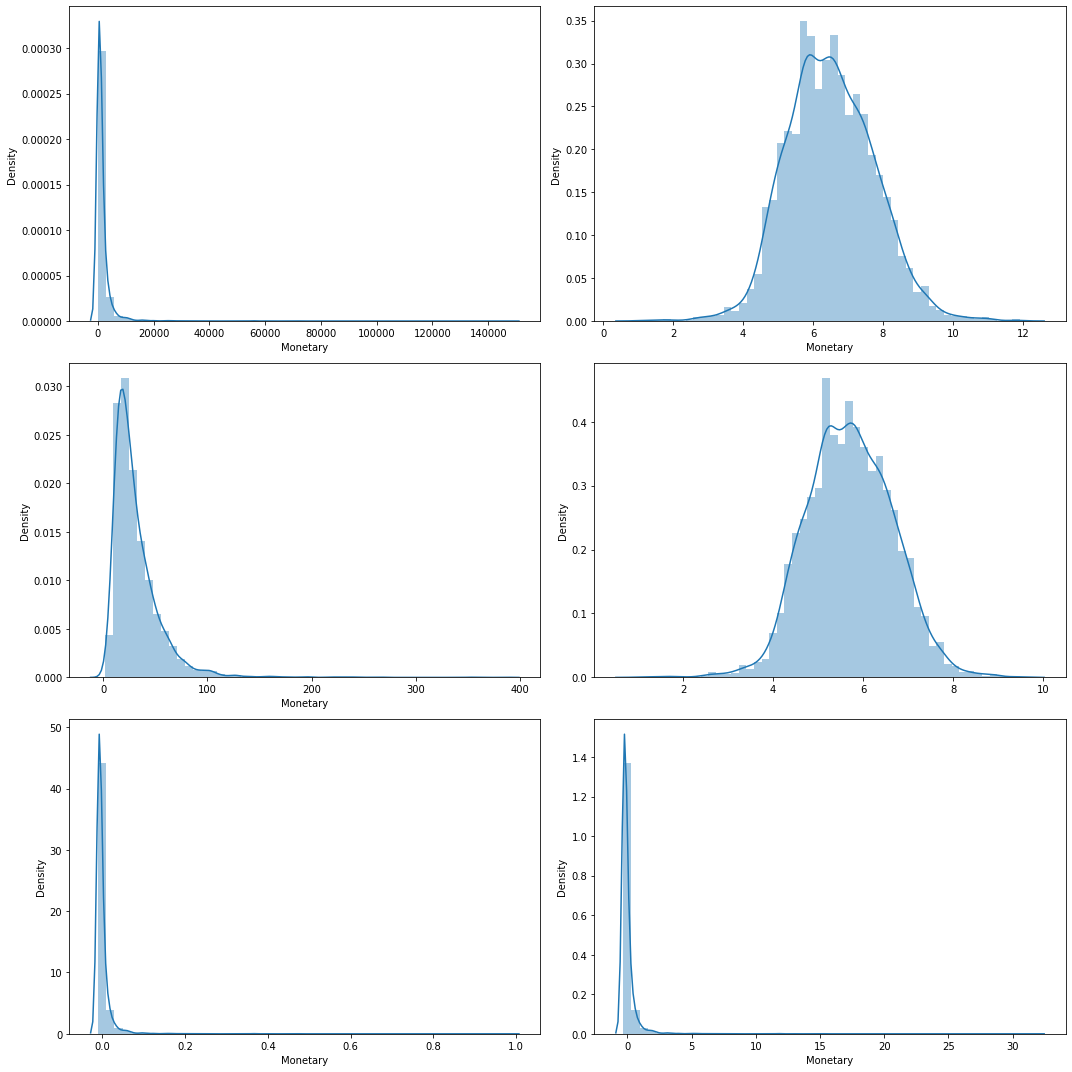

Before: 16.63
Log: 0.17
Sqrt: 3.92
Boxcox: -0.01
Mean_Normal: 16.63
Z_score: 16.63


In [42]:
skewness("Monetary")

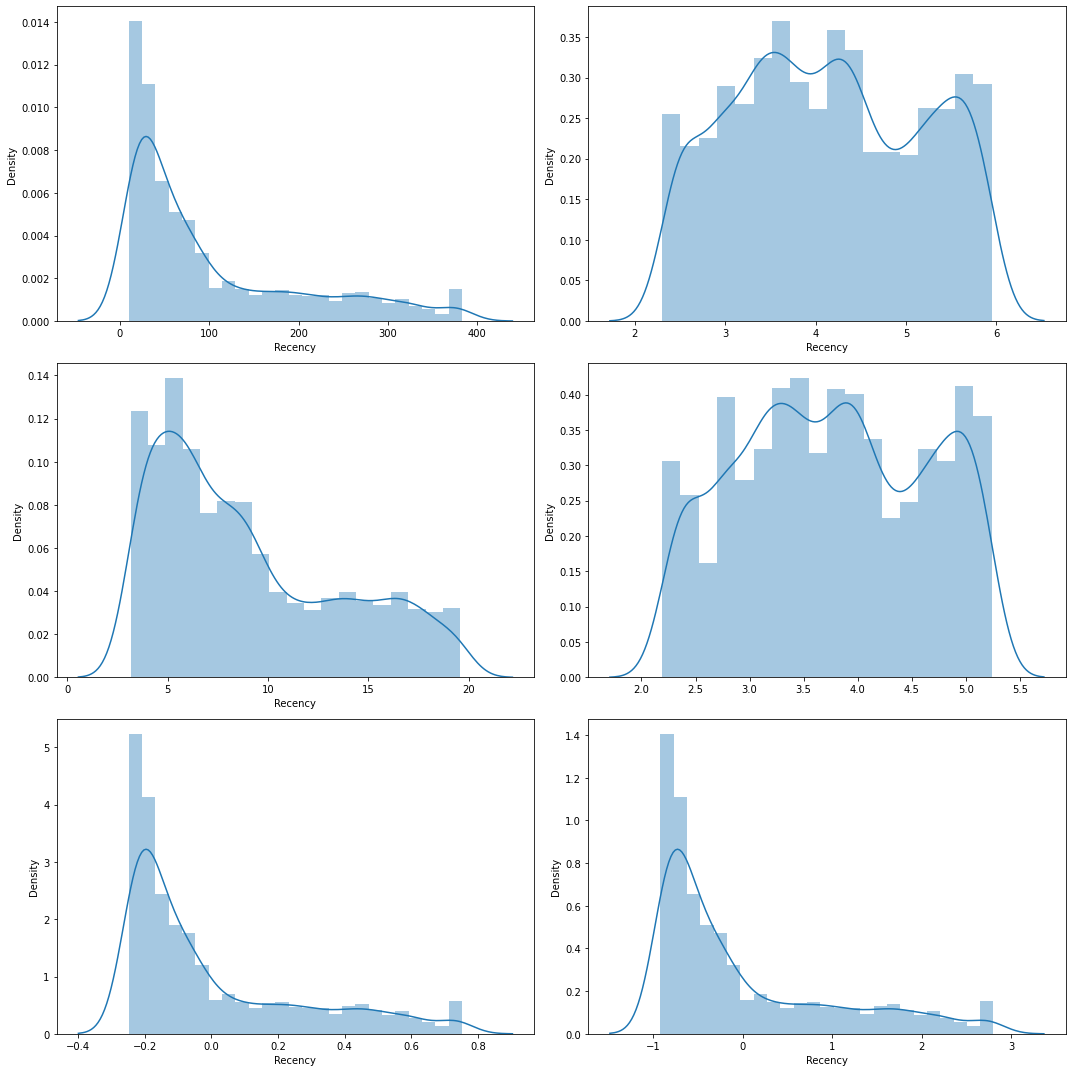

Before: 1.24
Log: 0.08
Sqrt: 0.72
Boxcox: 0.02
Mean_Normal: 1.24
Z_score: 1.24


In [43]:
skewness("Recency")

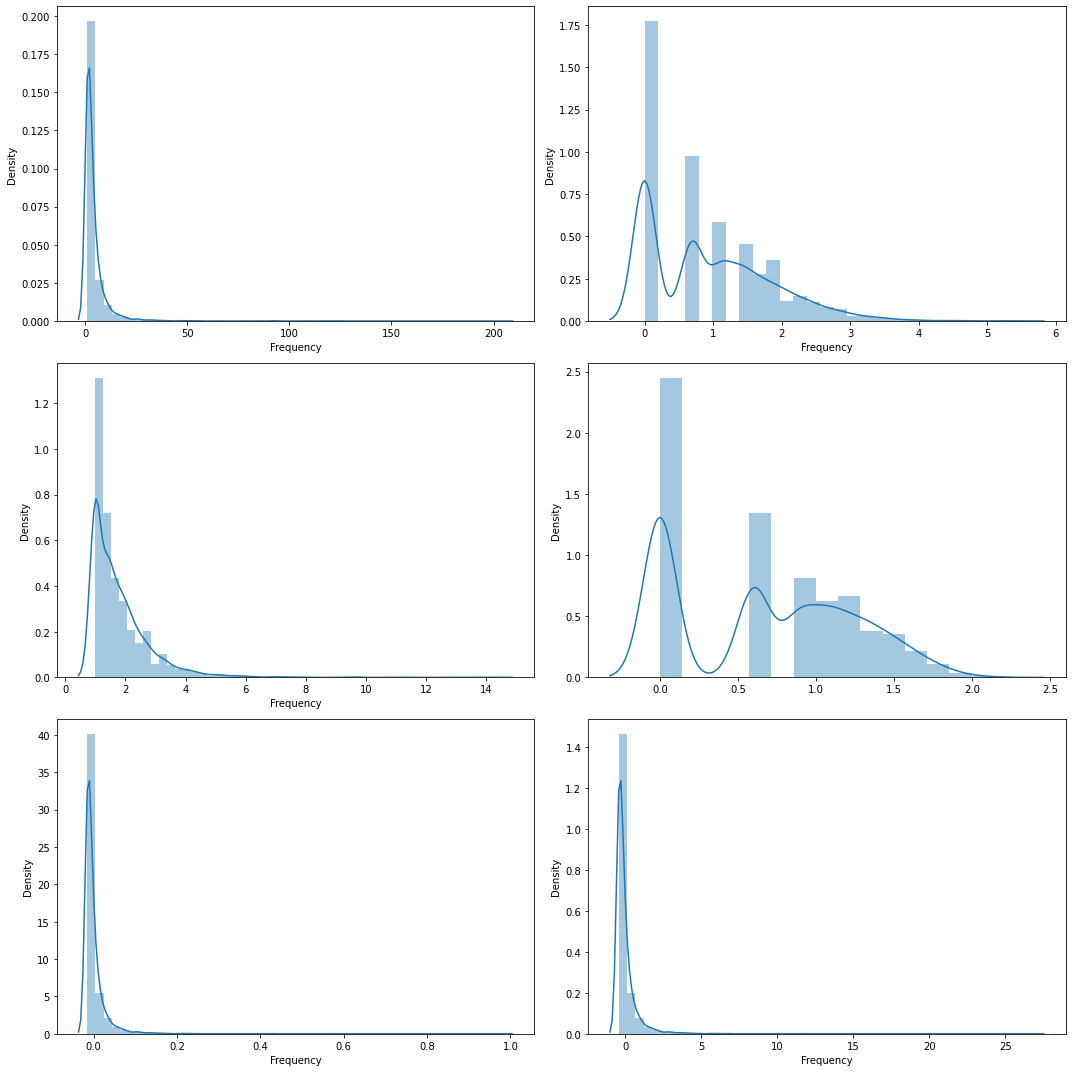

Before: 12.48
Log: 0.78
Sqrt: 3.01
Boxcox: 0.15
Mean_Normal: 12.48
Z_score: 12.48


In [44]:
skewness("Frequency")

Because the Box-Cox method has the smallest skew, we choose this method to normalize the data accordingly.

In [45]:
# Tranformation
RFM_t = RFM.copy()
RFM_t["Recency_t"] = stats.boxcox(RFM_t["Recency"])[0]
RFM_t["Frequency_t"] = stats.boxcox(RFM_t["Frequency"])[0]
RFM_t["Monetary_t"] = stats.boxcox(RFM_t["Monetary"])[0]
RFM_t = RFM_t[["Recency_t","Frequency_t","Monetary_t"]]
RFM_t.head(5)

,Recency_t,Frequency_t,Monetary_t
CustomerID,,,
16954.0,2.190674,1.439421,6.591675
14051.0,2.190674,1.750408,8.019938
17581.0,2.190674,1.761835,7.757691
12433.0,2.190674,1.333333,7.873559
14422.0,2.190674,1.262547,7.112301


We already have normalized data to put into the model

# 4. Modeling

We use the Elbow method to choose the optimal number of clusters and use the Silhouette coefficient to reinforce it

Elbow method:

<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='SSE'>

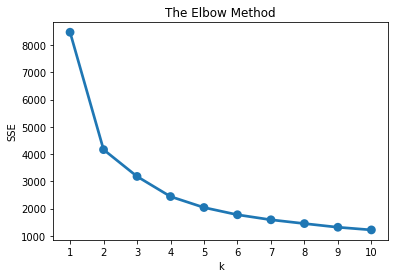

In [46]:
sse = {}
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(RFM_t)
    sse[k] = kmeans.inertia_
    
plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

We choose n = 4 as the optimal number of clusters because then the SSE does not fluctuate much anymore

In [47]:
# Quality assessment of the number of clusters
number_cluster = [2,3,4,5,6]
for i in number_cluster:
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(RFM_t)
    RFM_t["Cluster"] = model.labels_
    score = silhouette_score (RFM_t, model.labels_)
    print("Silhouette score: " + str(round(score,2)))
    print("For n_clusters={0}, the silhouette score is {1}".format(i, round(score,2)))

Silhouette score: 0.49
For n_clusters=2, the silhouette score is 0.49
Silhouette score: 0.5
For n_clusters=3, the silhouette score is 0.5
Silhouette score: 0.58
For n_clusters=4, the silhouette score is 0.58
Silhouette score: 0.52
For n_clusters=5, the silhouette score is 0.52
Silhouette score: 0.56
For n_clusters=6, the silhouette score is 0.56


With the highest Silhouette coefficient, 4 is the optimal number of clusters. The Silhouette coefficient runs from [-1,1] so 0.58 shows that this clustering is significant

In [48]:
model = KMeans(n_clusters = 4, max_iter=50,random_state=1)
model.fit(RFM_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [49]:
RFM_t["Cluster"] = model.labels_
RFM_t.head(5)

,Recency_t,Frequency_t,Monetary_t,Cluster
CustomerID,,,,
16954.0,2.190674,1.439421,6.591675,2
14051.0,2.190674,1.750408,8.019938,2
17581.0,2.190674,1.761835,7.757691,2
12433.0,2.190674,1.333333,7.873559,2
14422.0,2.190674,1.262547,7.112301,2


We have clustered for customers (with 4 clusters)

How do we see the ratio of each cluster to the total number of customers?

In [50]:
Cluster_count = RFM_t["Cluster"].value_counts()
Cluster_percent = (RFM_t["Cluster"].value_counts()/df["CustomerID"].nunique())*100
Cluster = pd.DataFrame({"Number Of Customer": Cluster_count,"Percent_Customer": round(Cluster_percent,2)})
Cluster

,Number Of Customer,Percent_Customer
0,1357,31.61
1,1230,28.65
3,997,23.22
2,709,16.52


Now we will calculate the average value of each factor Recency, Frequency, Monetary of each group to see which group is the best. By combining with df and calculating the mean of these factors

In [51]:
# Merge RFM và RFM_t
RFM_merge = pd.merge(RFM,RFM_t,on = "CustomerID")
# Just get Recency, Frequency, Monatary,Cluster
RFM_merge = RFM_merge[["Recency","Frequency","Monetary","RFM_rating","Cluster"]]

In [52]:
cluster = RFM_merge.groupby("Cluster").mean().round(2)
cluster = cluster.sort_values("Monetary", ascending = False)
cluster["Monetary_Percent"] = round(cluster["Monetary"]/sum(cluster["Monetary"]),2)*100
cluster

,Recency,Frequency,Monetary,Monetary_Percent
Cluster,,,,
2,20.97,12.83,5943.11,73.0
1,51.94,4.26,1407.24,17.0
0,227.00,1.55,405.36,5.0
3,52.42,1.51,336.02,4.0


- We can see that group 2 is the best group, bringing in the most revenue (accounting for more than 73% of total revenue), the most frequent transactions and the most recent transactions => Same as the 80/20 rule, In this case, we have 73% of revenue from 17% of customer group (group 2)
- Group 1 is the group that brings normal revenue, brings in just less than group 3, the transaction is not much and the last transaction time is within 2 months
- Group 3 is the group that brings in very little revenue, and very little transactions and transaction time (Within 2 months)
- Group 0 is the group that brings very little revenue, and trades very little and the transaction time is also very long

We will plot the distribution of the groups according to log values for easy visualization

<Figure size 1080x1080 with 0 Axes>

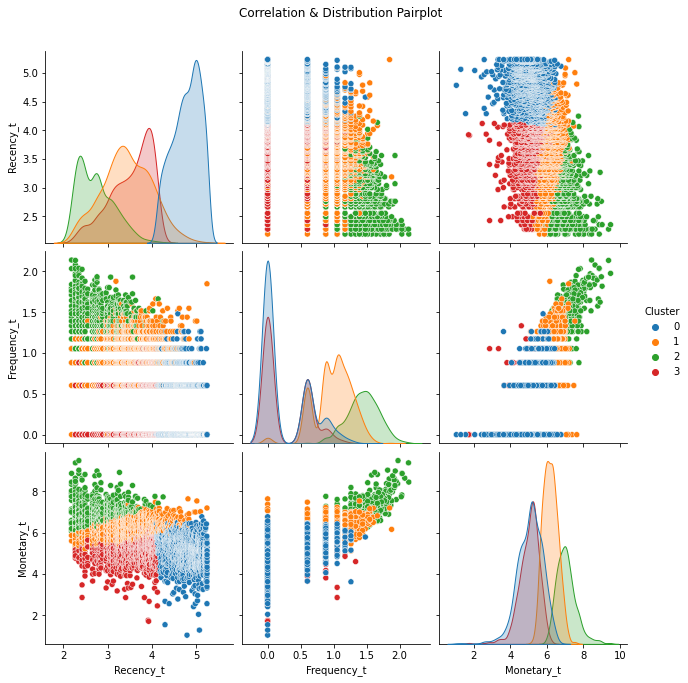

In [53]:
plt.figure(figsize = (15, 15))
sns.pairplot(RFM_t, hue = "Cluster", height = 3, palette = "tab10" )
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()

We plot the plot against the actual values of the three factors so that we can see how the groups are dispersed:

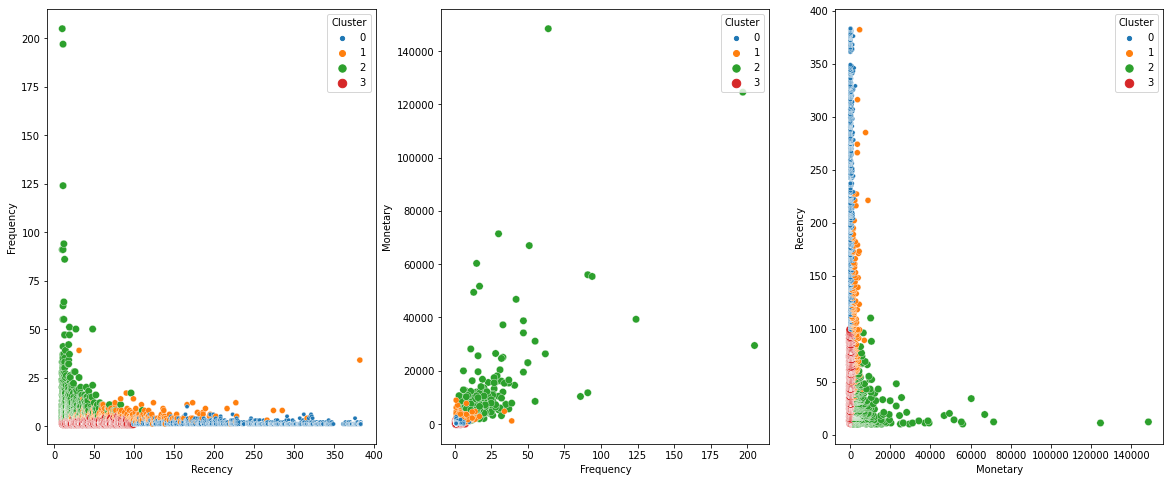

In [54]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=RFM_merge,x="Recency",y="Frequency",hue="Cluster",size="Cluster",palette="tab10")
plt.subplot(1,3,2)
sns.scatterplot(data=RFM_merge,x="Frequency",y="Monetary",hue="Cluster",size="Cluster",palette="tab10")
plt.subplot(1,3,3)
sns.scatterplot(data=RFM_merge,x="Monetary",y="Recency",hue="Cluster",size="Cluster",palette="tab10")
plt.show()

We see that group 3 is the best customer group but also the group with the strongest dispersion, there are many outliers that need to focus on further analysis.

Column chart shows the number of customers in each cluster

<BarContainer object of 4 artists>

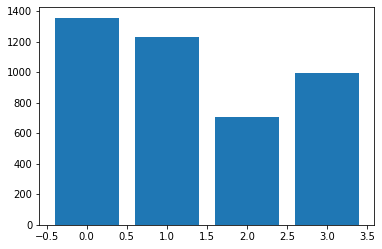

In [55]:
plt.bar( Cluster.index, Cluster["Number Of Customer"], data=Cluster)

<BarContainer object of 4 artists>

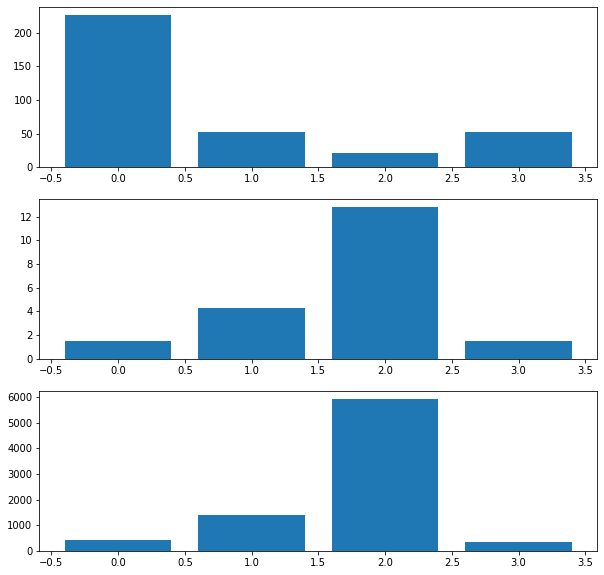

In [56]:
fig,ax = plt.subplots(3,figsize=(10,10))

ax[0].bar( cluster.index, cluster["Recency"], data=cluster)
ax[1].bar( cluster.index, cluster["Frequency"], data=cluster)
ax[2].bar( cluster.index, cluster["Monetary"], data=cluster)

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

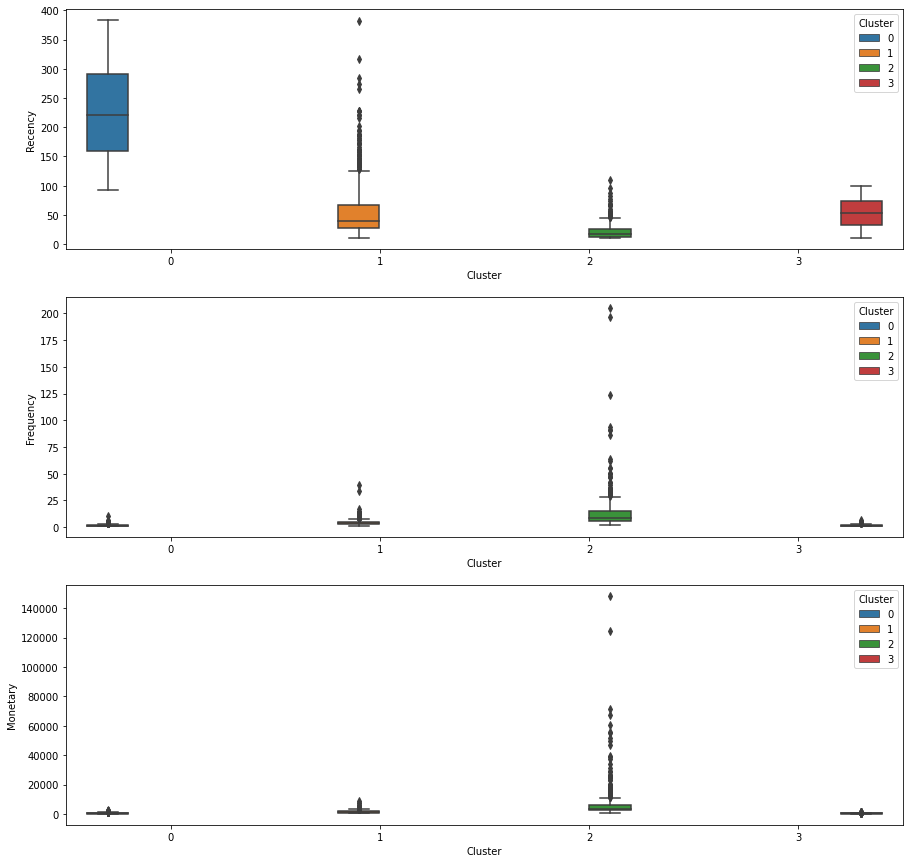

In [57]:
# Quantitative variables analysis between groups
fig = plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
sns.boxplot(x="Cluster",y="Recency", hue="Cluster", data = RFM_merge)
plt.subplot(3,1,2)
sns.boxplot(x="Cluster",y="Frequency", hue="Cluster", data = RFM_merge)
plt.subplot(3,1,3)
sns.boxplot(x="Cluster",y="Monetary", hue="Cluster", data = RFM_merge)

We see that if we consider the median Recency of group 2, it is the lowest of the 4 groups

Median Frequency of group 2 was not significantly larger than that of other groups. However, because there are many outliers, the mean of group 2 is higher

Median Monetary of group 2 is not significantly larger than that of other groups. However, because there are many outliers, the mean of group 2 is higher

=> Need to study these outliers carefully to understand the difference between group 2 and other groups

# 5. Evaluation (EDA each group to find unique feature of it)

We focus on discovering group 2 is the best customer group (to find insights).

We can see that group 2 is the best group, bringing in the most revenue (accounting for more than 73% of total revenue), the most frequent transactions and the most recent transactions => Same as the 80/20 rule, In this case, we have 73% of revenue from 17% of customer group (group 2)

Group 1 is the group that brings normal revenue, brings in just less than group 3, does not have many transactions and the last transaction time is within 2 months

Group 3 is the group that brings in very little revenue, and very little transactions and transaction time (Within 2 months)

Group 0 is the group that brings very little revenue, and trades very little and the transaction time is also very long

Group 2 is the most VIP customer group, so focus on maintaining and taking special care. There are a few factors to consider:
1. What items to buy?
2. Which keyword is the most?
3. What is the quantity of each purchase?
4. Which country has the highest concentration of VIP guests?
5. When do VIP customers usually buy goods?
6. Which customer deals best and most often?

In [58]:
df1 = pd.merge(df,RFM_t, on =["CustomerID"])
df1 = df1[df1["Cluster"] == 2] # Group 2
df1.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descriptions,Sales,Recency_t,Frequency_t,Monetary_t,Cluster
289,536390,85123A,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,163.2,2.35491,1.818543,9.025692,2
290,537457,85123A,32,2010-12-07 09:51:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,81.6,2.35491,1.818543,9.025692,2
291,538991,85123A,32,2010-12-15 11:53:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,81.6,2.35491,1.818543,9.025692,2
292,542789,85123A,32,2011-02-01 10:38:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,81.6,2.35491,1.818543,9.025692,2
293,544667,85123A,64,2011-02-22 15:09:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,163.2,2.35491,1.818543,9.025692,2


In [59]:
# Description Statistic in group 2
df1.describe()

,Quantity,UnitPrice,Sales,Recency_t,Frequency_t,Monetary_t,Cluster
count,208283.000000,208283.000000,208283.000000,208283.000000,208283.000000,208283.000000,208283.0
mean,10.824863,2.766162,20.230465,2.672395,1.596878,7.455839,2.0
std,15.659494,2.656416,34.481646,0.397720,0.282398,0.768914,0.0
min,1.000000,0.000000,0.000000,2.190674,0.602057,5.981453,2.0
25%,2.000000,1.250000,4.950000,2.354910,1.391082,6.909679,2.0
50%,6.000000,1.950000,12.500000,2.554149,1.575945,7.289433,2.0
75%,12.000000,3.750000,19.800000,2.891623,1.772607,7.813423,2.0
max,100.000000,16.950000,1356.000000,4.249706,2.139272,9.488141,2.0


Text(0.5, 1.0, 'Top 10 Most Common Descriptions')

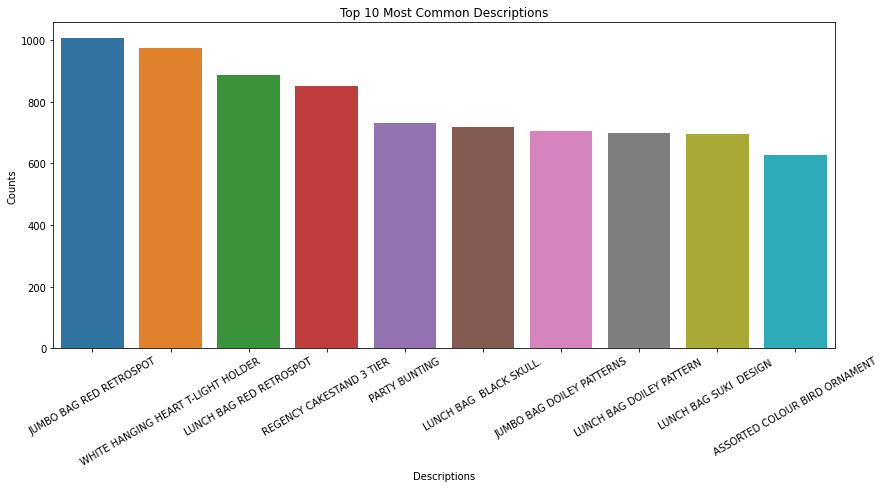

In [60]:
# 1. What items to buy?
count_description = df1["Descriptions"].value_counts().sort_values(ascending=False).iloc[:10] # Top 10 most descriptions
# Visualize
plt.figure(figsize =(14,6))
sns.barplot(count_description.index, count_description.values)
plt.ylabel("Counts")
plt.xlabel("Descriptions")
plt.xticks(rotation =30) 
plt.title("Top 10 Most Common Descriptions")

We see that Jumbo Bag Red Retrospot, White Hanging Heart T-Light Holder and Lunch Bag Red Retrospot are the 3 items most purchased by VIP customers.

In which Bag items are bought a lot such as Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot, Lunch Bag Black Skull, Jumbo Bag Dolley Patterns, Lunch Bag Suki Design

Text(0.5, 1.0, 'Top 10 Popular Keywords')

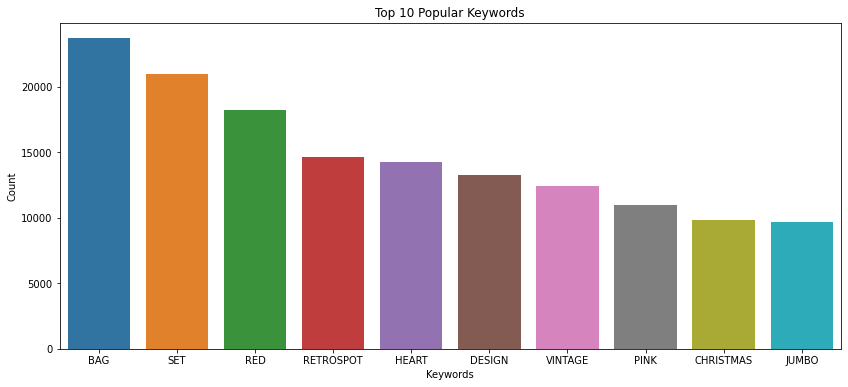

In [61]:
# Split each word into list
lists = []
keywords = []
for i in df1["Descriptions"]:
  i = str(i)
  words = i.split(" ")
  lists.append(words)
  for j in range(len(words)):
    keywords.append(words[j])

# Drop some keywords that have less than 2 characters (It's not meaningful)
keywords = pd.DataFrame(keywords,columns=["Keyword"])
keywords = keywords.drop(keywords[keywords["Keyword"].str.len() <= 2 ].index)

keywords = keywords["Keyword"].value_counts().sort_values(ascending = False).iloc[:10]

# Visualize
plt.figure(figsize=(14,6))
sns.barplot(keywords.index,keywords.values)
plt.ylabel("Count")
plt.xlabel("Keywords")
plt.title("Top 10 Popular Keywords")

Keyword BAG accounts for the largest proportion => Shows that VIP customers really like BAG products

The keyword SET accounts for the second highest proportion => Shows that this customer group prefers to buy products in sets rather than individually

The keyword RED accounts for the 3rd highest proportion => Shows that this customer group likes red products the most

Other keywords like Heart, Design, Vintage, Pink show that this group of customers may be mostly female. However, since the dataset does not have a Sex variable, we cannot test it

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'PARTY BUNTING'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'CHILLI LIGHTS'),
  Text(5, 0, 'JUMBO BAG DOILEY PATTERNS'),
  Text(6, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(7, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(8, 0, 'SPOTTY BUNTING'),
  Text(9, 0, 'ASSORTED COLOUR BIRD ORNAMENT')])

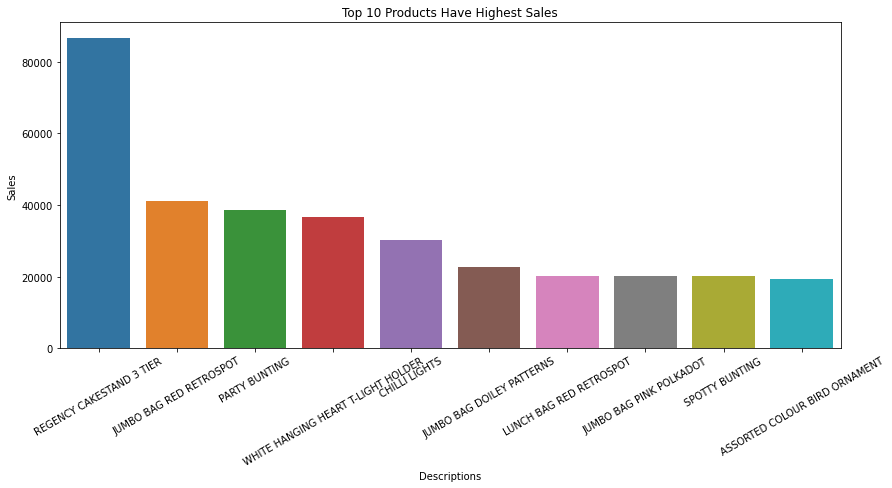

In [62]:
# Top 10 Products Have A Highest Sales
top10_sales = df1.groupby(["Descriptions"],as_index=False)["Sales"].sum()
top10_sales = top10_sales.sort_values(by = "Sales", ascending = False).iloc[:10]

plt.figure(figsize=(14,6))
sns.barplot(top10_sales["Descriptions"],top10_sales["Sales"])
plt.ylabel("Sales")
plt.xlabel("Descriptions")
plt.title("Top 10 Products Have Highest Sales")
plt.xticks(rotation =30) 

Although Jumbo Bag Red Retrospot was bought the most, the new Regency Cakestand 3 tier product brought in the highest sales, double the sales of the 2nd product, Jumbo Bag Red Retrospot => This is the product that needs to be checked break and test further

In [63]:
# The proportion of VIP customers with total revenue in the UK
revenues = df1.loc[df1["Country"] == "United Kingdom"]["Sales"].sum() # Total revenues that this firm can earn in UK
percent_revenues = revenues/df1["Sales"].sum() *100
print(" Total Sales that this firm earn in UK are " + str(revenues))
print(" Percent sales that this firm earn in UK are " + str(round(percent_revenues,3)) + "%")
print(" Percent sales that this firm earn in the orthers are " + str(round(100 - percent_revenues,3)) + "%")

 Total Sales that this firm earn in UK are 3382043.119999999
 Percent sales that this firm earn in UK are 80.264%
 Percent sales that this firm earn in the orthers are 19.736%


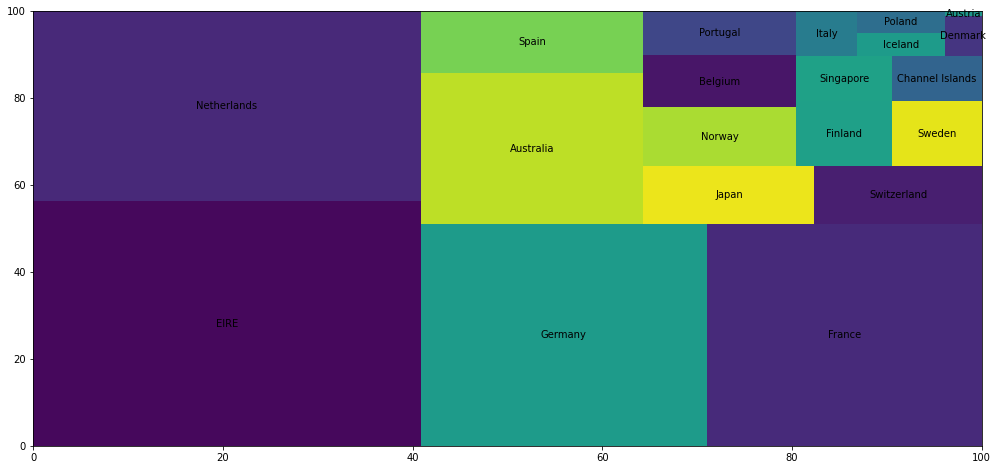

In [64]:
# Countries where the VIP group accounts for the highest total revenue (except UK)
country_revenue = df1.groupby(["Country"]).sum()["Sales"].sort_values(ascending = False)[1:] # Take 1: to filter UK

#fig = pe.pie(names=country_revenue.index,values=country_revenue.values,width=850,height=600,)
#fig.show()
plt.figure(figsize=(17,8))
fig = squarify.plot(sizes= country_revenue.values, label = country_revenue.index )
plt.show()

In addition to UK sales accounting for more than 80%, foreign sales are negligible (concentrated in EIRE, Netherlands, Germany and France)

Text(0.5, 1.0, 'Number Of Invoice From Customer')

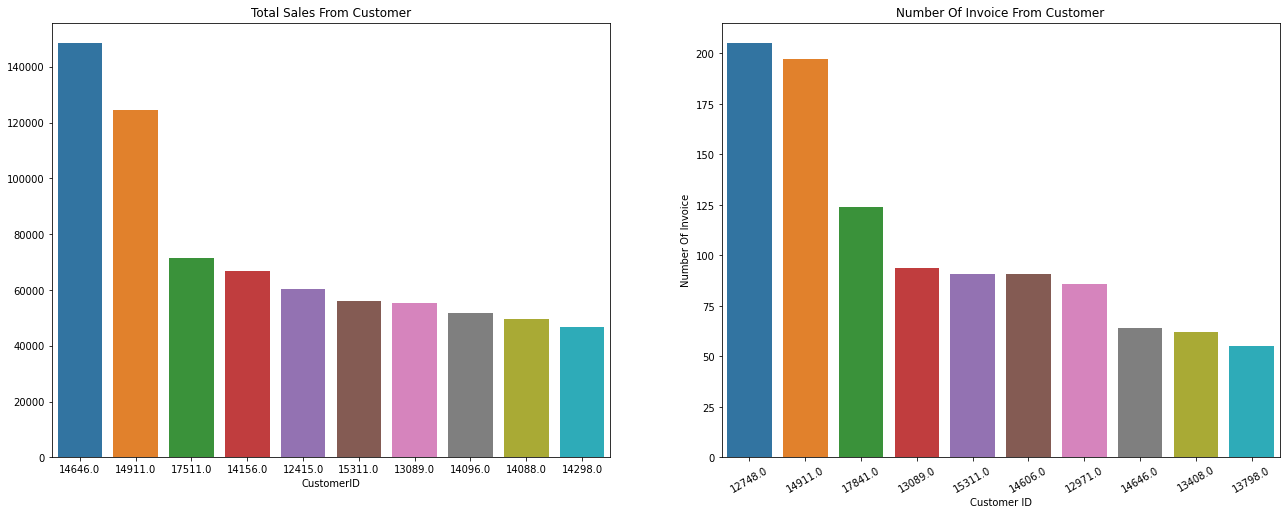

In [65]:
# Customers buy goods with the highest revenue
top_customer_sale = df1.groupby(by="CustomerID")["Sales"].sum().sort_values(ascending = False).iloc[:10]
top_customer_invoice = df1.groupby(by="CustomerID")["InvoiceNo"].nunique().sort_values(ascending = False).iloc[:10]

fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.barplot(x=top_customer_sale.index,y=top_customer_sale.values, ax=ax[0])
plt.xticks(rotation =50)
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
ax[0].set_title("Total Sales From Customer")

sns.barplot(x=top_customer_invoice.index,y=top_customer_invoice.values, ax=ax[1])
plt.xticks(rotation =30)
plt.xlabel("Customer ID")
plt.ylabel("Number Of Invoice")
ax[1].set_title("Number Of Invoice From Customer")

The customer with ID 14646 generates the most revenue, but this customer only buys less than 75 orders

Customer with ID 14911 generates the 2nd highest revenue, and this customer also buys many orders with nearly 200 orders

Customers with ID 12748 buy the most orders with more than 200 orders. However, the customer just now is not in the top 10 customers that bring the highest revenue for the company

=> It can be said that buying a lot of orders does not necessarily bring a lot of revenue for the company, but also depends on the value of the product in that order => Re-verification

Explore more about customer ID 14646

In [66]:
Customer_14646 = df1[df1["CustomerID"] == "14646.0"]
Customer_14646.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descriptions,Sales,Recency_t,Frequency_t,Monetary_t,Cluster
176548,564650,84406B,64,2011-08-26 14:17:00,3.75,14646.0,Netherlands,CREAM CUPID HEARTS COAT HANGER,240.00,2.35491,1.976115,9.488141,2
176549,541711,22752,2,2011-01-21 11:18:00,8.50,14646.0,Netherlands,SET 7 BABUSHKA NESTING BOXES,17.00,2.35491,1.976115,9.488141,2
176550,578140,22752,24,2011-11-23 10:58:00,7.65,14646.0,Netherlands,SET 7 BABUSHKA NESTING BOXES,183.60,2.35491,1.976115,9.488141,2
176551,563076,22745,60,2011-08-11 16:12:00,1.85,14646.0,Netherlands,POPPY'S PLAYHOUSE BEDROOM,111.00,2.35491,1.976115,9.488141,2
176552,539731,22749,48,2010-12-21 15:05:00,3.39,14646.0,Netherlands,FELTCRAFT PRINCESS CHARLOTTE DOLL,162.72,2.35491,1.976115,9.488141,2


In [69]:
# TIME

In [70]:
# Create more time fields
# Convert InvoiceDate
time = df1.copy()
time["InvoiceDate"] = pd.to_datetime(time["InvoiceDate"])
# Transfer invoicedate to datetime dtype and split date and time  
time["InvoiceHour"] = time["InvoiceDate"].dt.strftime("%H") # Get hour from datetime
time["Month"] = time["InvoiceDate"].dt.strftime("%m") # Get hour from datetime
time["Year"] = time["InvoiceDate"].dt.strftime("%Y") # Get year from datetime
time["Weekday"] = time["InvoiceDate"].dt.strftime("%A") # Get weekday from datetime
time["InvoiceHour"] = time["InvoiceHour"].astype(int) # Tranfer object type to int type
time["InvoiceDate"] = time["InvoiceDate"].dt.strftime("%Y-%m-%d") # Just keep year - month - day aand remove time

<AxesSubplot:xlabel='Year', ylabel='Month'>

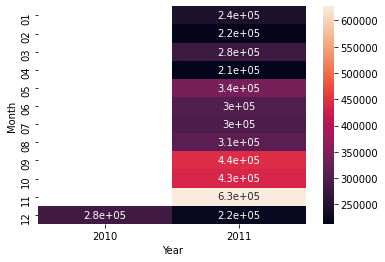

In [71]:
# Peak time for VIP customers to buy goods
caodiem = time.set_index("InvoiceDate")

heatmap = pd.pivot_table(caodiem,values="Sales",aggfunc="sum",index=["Month"],columns="Year") # Create a pivot table with month index and year column, sum of Quantity
sns.heatmap(heatmap,annot = True)

Since December 2011 has not been updated enough, we can see the company's accumulated revenue by month

C:\Users\tri\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:323: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\tri\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:323: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 1.0, 'Revenue with Month')

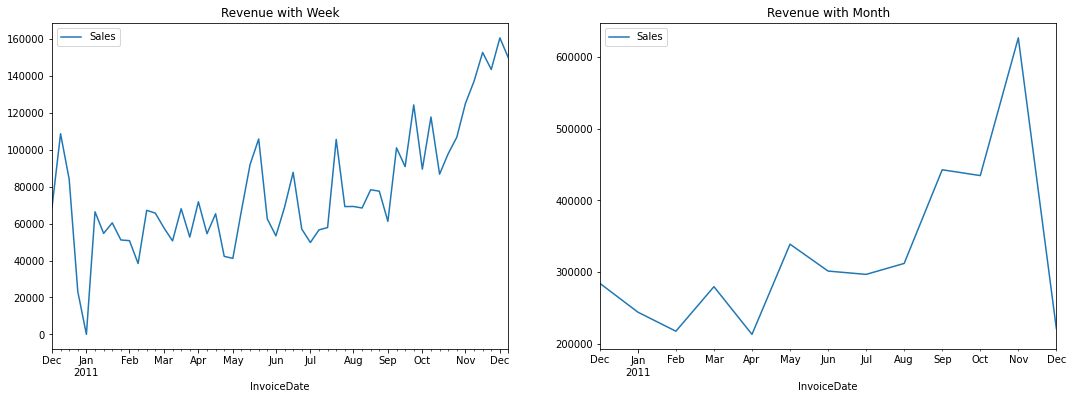

In [72]:
# Line bar of revenue
fig, ax = plt.subplots(1,2,figsize=(18,6))

caodiem.index = pd.to_datetime(caodiem.index) # Trasfer index to datetime type
revenue_week = caodiem[["Sales"]].resample('W').sum()
revenue_week.plot(ax=ax[0])
ax[0].set_title("Revenue with Week")

#revenue_month = df1[["Revenue"]]
revenue_month = caodiem[["Sales"]].resample('M').sum()
revenue_month.plot(ax=ax[1])
ax[1].set_title("Revenue with Month")

It can be seen that the period from August to December is the peak of the company. Revenue increased very quickly although before that, the company's revenue fluctuated strongly and the trend was not clearly defined

Text(0.5, 1.0, 'Accumulated Revenue By Month')

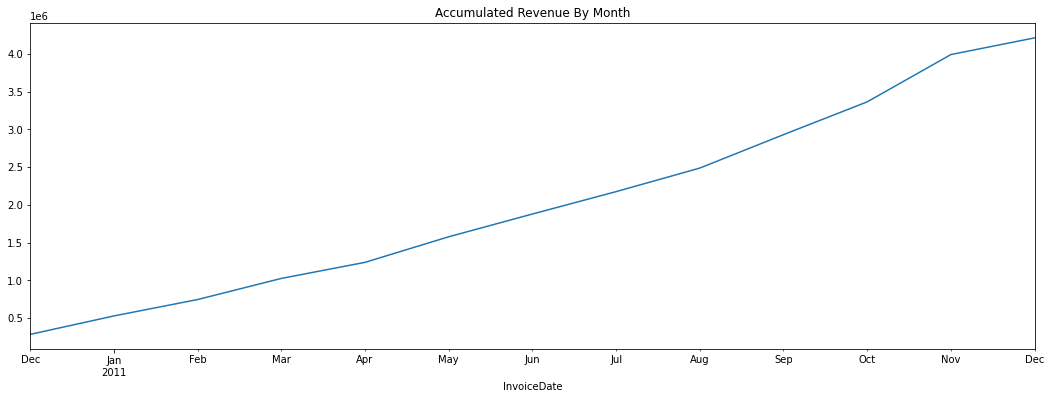

In [73]:
plt.figure(figsize=(18,6))

cum_revenue_month = caodiem[["Sales"]].resample('M').sum()
cum_revenue_month["cum"] = cum_revenue_month.cumsum()
fig = cum_revenue_month["cum"].plot()
fig.set_title("Accumulated Revenue By Month")


The chart of accumulated revenue of VIP customer group => Based on this, can the revenue be predicted in the next year

Text(0.5, 1.0, 'Number Of Invoices In Hour')

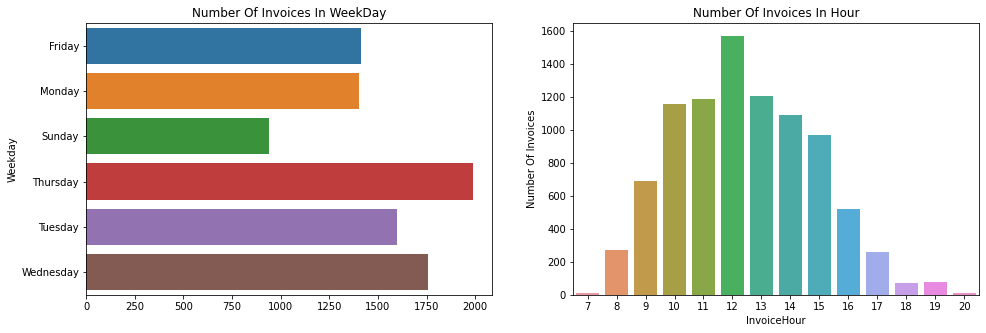

In [74]:
# Peak time for purchasing of VIP customer groups
groupby_weekday = caodiem.groupby(by="Weekday")["InvoiceNo"].nunique()

fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.barplot(y=groupby_weekday.index,x=groupby_weekday.values, ax=ax[0])
plt.xlabel("Number Of Invoices")
plt.ylabel("Weekday")
ax[0].set_title("Number Of Invoices In WeekDay")

groupby_hour = caodiem.groupby(by="InvoiceHour")["InvoiceNo"].nunique()

sns.barplot(x=groupby_hour.index,y=groupby_hour.values,ax=ax[1])
plt.xlabel("InvoiceHour")
plt.ylabel("Number Of Invoices")
ax[1].set_title("Number Of Invoices In Hour")

Customer group 2 makes the most purchases on Wednesdays and Thursdays. Especially the dataset does not have a Saturday and orders on Sunday are the lowest.

The period from 10am - 2pm is the peak time that VIP customers place orders

Text(0.5, 1.0, 'Total Sales In Hour')

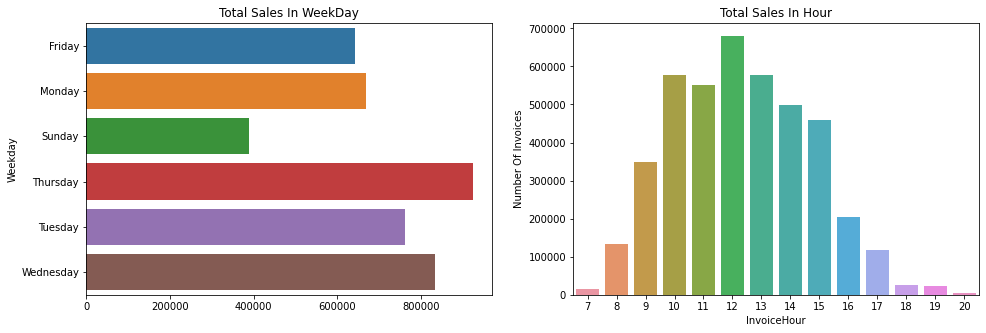

In [75]:
# Peak time with the highest revenue of VIP customer group
groupby_weekday = caodiem.groupby(by="Weekday")["Sales"].sum()

fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.barplot(y=groupby_weekday.index,x=groupby_weekday.values, ax=ax[0])
plt.xlabel("Sales")
plt.ylabel("Weekday")
ax[0].set_title("Total Sales In WeekDay")

groupby_hour = caodiem.groupby(by="InvoiceHour")["Sales"].sum()

sns.barplot(x=groupby_hour.index,y=groupby_hour.values,ax=ax[1])
plt.xlabel("InvoiceHour")
plt.ylabel("Number Of Invoices")
ax[1].set_title("Total Sales In Hour")

Like the number of orders placed

Customer group 2 brings the most revenue on Wednesdays and Thursdays. Especially the dataset does not have a Saturday and the revenue on Sunday is the lowest.

The period from 10am - 2pm is the peak time to bring the highest revenue

Summary:

For Group 2 Customers (VIP):

1. umbo Bag Red Retrospot, White Hanging Heart T-Light Holder and Lunch Bag Red Retrospot are the 3 items most purchased by VIP customers. In which Bag items are bought a lot such as Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot, Lunch Bag Black Skull, Jumbo Bag Dolley Patterns, Lunch Bag Suki Design
2. Jumbo Bag Red Retrospot was bought the most, but the new Regency Cakestand 3 tier product brought in the highest revenue, double the sales of the 2nd product, Jumbo Bag Red Retrospot => This is the product that needs to be discovered and further test
3. The keyword BAG accounts for the largest proportion => Shows that the VIP group of customers likes the BAG product group very much. The keyword SET accounts for the second highest proportion => Shows that this customer group prefers to buy products in sets rather than individually. The keyword RED accounts for the 3rd highest proportion => Shows that this customer group likes red products the most. Other keywords like Heart, Design, Vintage, Pink show that this group of customers may be mostly female. However, since the dataset does not have a Sex variable, we cannot test it
4. Although Jumbo Bag Red Retrospot was bought the most, the new Regency Cakestand 3 tier product brought in the highest sales, double the sales of the 2nd product, Jumbo Bag Red Retrospot => This is the product that needs to be checked break and test further
5. In addition to UK sales accounting for more than 80%, foreign sales are negligible (concentrated in EIRE, Netherlands, Germany and France)
6. The customer with ID 14646 generates the most revenue, but this customer only buys less than 75 orders

Customer with ID 14911 generates the 2nd highest revenue, and this customer also buys many orders with nearly 200 orders

Customers with ID 12748 buy the most orders with more than 200 orders. However, the customer just now is not in the top 10 customers that bring the highest revenue for the company

=> It can be said that buying a lot of orders does not necessarily bring a lot of revenue to the company, but also depends on the value of the product in that order => Re-verification

Learn more about customer ID 14646

7. It can be seen that the period from August to December is the peak of the company. Revenue increased very quickly although before that, the company's revenue fluctuated strongly and the trend was not clearly defined
8. Customer group 2 brings the most revenue on Wednesdays and Thursdays. Especially the dataset does not have a Saturday and the revenue on Sunday is the lowest.
The period from 10am - 2pm is the peak time to bring the highest revenue